# Vectors (Rank 1 Tensors)

Characteristics of Vectors:

- One-dimensional array of numbers
- Denoted in lowercase bold italics $\boldsymbol{x}$
- Arranged in an order so then elements can be accessed by their index
    - Each element of a vector is a scalar, e.g. the second element of vector $\boldsymbol{x}$ is $x_2$
- Vectors represent a point in space
    - A vector of length $n$ represents a point in $n$-dimensional space
- Vectors represent a magnitude and direction from the origin

## Vector transposition

Transposition is denoted by a superscript $T$ on a vector. Transposition transforms a column vector into a row vector and vice versa.

For example:

$$[x_1, x_2, x_3]^T = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$$

The shape of the row vector is $(1, 3)$ and the shape of the column vector is $(3, 1)$.

## Vectors with Python

### Creating vectors

In [46]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating vectors NumPy

In [2]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [3]:
len(x)

3

In [4]:
x.shape

(3,)

In [5]:
type(x)

numpy.ndarray

In [6]:
x[0]

25

In [7]:
type(x[0])

numpy.int32

##### Vector transposition

With NumPy, we can transpose a vector using the `T` attribute.

However, transposing a 1-D array will not change its shape:

In [23]:
x_t = x.T
x_t

array([25,  2,  5])

In [24]:
x_t.shape

(3,)

Using the nested square brackets, instead:

In [25]:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [26]:
y.shape

(1, 3)

In [27]:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [28]:
y_t.shape

(3, 1)

And it can be transposed back to a row vector:

In [29]:
y_t_t = y_t.T
y_t_t

array([[25,  2,  5]])

In [30]:
y_t_t.shape

(1, 3)

##### Zero vectors

Zero vectors are vectors with all elements equal to zero.

They have no effect if added to another vector.

In [32]:
z = np.zeros(3)
z

array([0., 0., 0.])

#### Creating vectors with PyTorch

In [33]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

#### Creating vectors with TensorFlow

In [35]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

## Norms

Norms are functions that quantify the vector magnitude.

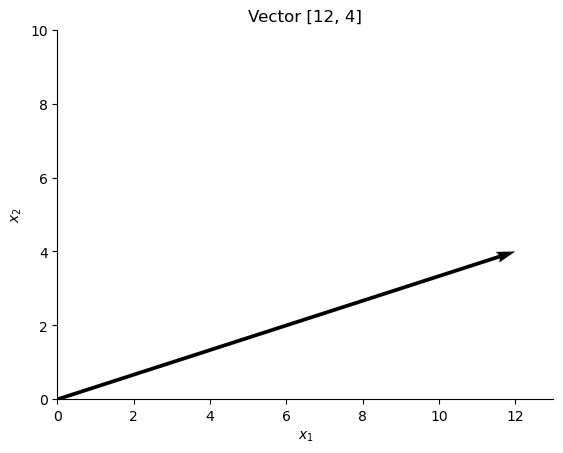

In [54]:
# plot of the vector [x1, x2] = [12, 4]
plt.quiver(0, 0, 12, 4, angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 13)
plt.ylim(0, 10)
sns.despine()
plt.title('Vector [12, 4]')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

### $L^2$ norm

We can calculate the $L^2$ norm of a vector $\boldsymbol{x}$ by taking the square of each element of the vector ($x_i^2$), summing them up ($\sum_{i}$) and taking the square root of the result.

In formula form:

$$||\boldsymbol{x}||_2= \sqrt{\sum_{i} x_i^2}$$

$L^2$ norm is also known as the Euclidean norm, and it is used to measure the distance between two points in Euclidean space. It's the kind of distance we are used to in the real world.

$L^2$ norm is the most common norm used in machine learning. It's so common it is often denoted as $||\boldsymbol{x}||$ without the subscript, as the assumption is that we are using the $L^2$ norm unless otherwise specified.

#### $L^2$ norm with Python

In [55]:
x

array([25,  2,  5])

Manually it can be calculated as:

In [56]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

With NumPy:

In [57]:
np.linalg.norm(x)

25.573423705088842

## Unit vectors

A unit vector is a vector with a magnitude of 1.

In more technical terms, $\boldsymbol{x}$ is a unit vector with unit norm, i.e. $||\boldsymbol{x}|| = 1$.

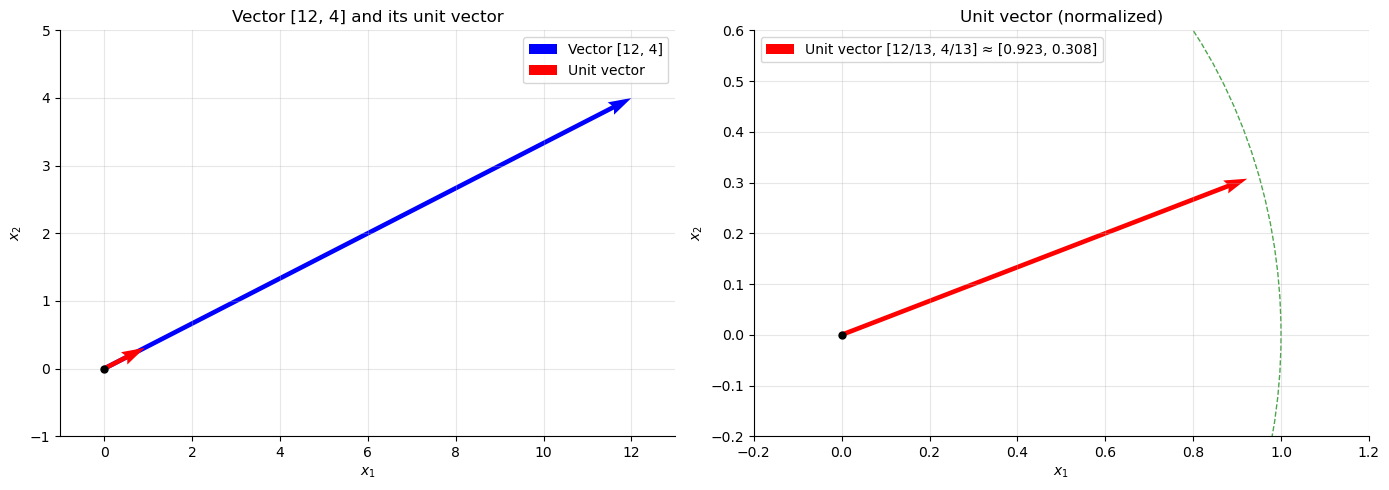

Vector: [12, 4]
Magnitude: √(12² + 4²) = √(144 + 16) = √160 = 12.649110640673518
Unit vector: [12/12.649110640673518, 4/12.649110640673518] = [0.949, 0.316]


In [85]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First plot - shows both vectors but scales properly to see the original vector
axes[0].quiver(0, 0, 12, 4, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector [12, 4]')
axes[0].quiver(0, 0, 12/13, 4/13, angles='xy', scale_units='xy', scale=1, color='red', label='Unit vector')
axes[0].set_xlim(-1, 13)
axes[0].set_ylim(-1, 5)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Vector [12, 4] and its unit vector')
axes[0].set_xlabel(r'$x_1$')
axes[0].set_ylabel(r'$x_2$')
axes[0].plot(0, 0, 'ko', markersize=5)  # Origin marker
axes[0].legend()
sns.despine(ax=axes[0])

# Second plot - focused on the unit vector with appropriate scale
axes[1].quiver(0, 0, 12/13, 4/13, angles='xy', scale_units='xy', scale=1, color='red',
               label=f'Unit vector [12/13, 4/13] ≈ [{12/13:.3f}, {4/13:.3f}]')
axes[1].set_xlim(-0.2, 1.2)
axes[1].set_ylim(-0.2, 0.6)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Unit vector (normalized)')
axes[1].set_xlabel(r'$x_1$')
axes[1].set_ylabel(r'$x_2$')
axes[1].plot(0, 0, 'ko', markersize=5)  # Origin marker
# Add unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='green', linestyle='--', alpha=0.7)
axes[1].add_artist(circle)
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

# Print calculation explanation
magnitude = np.sqrt(12**2 + 4**2)
print(f"Vector: [12, 4]")
print(f"Magnitude: √(12² + 4²) = √({12**2} + {4**2}) = √{12**2 + 4**2} = {magnitude}")
print(f"Unit vector: [12/{magnitude}, 4/{magnitude}] = [{12/magnitude:.3f}, {4/magnitude:.3f}]")

### $L^1$ norm

The absolute value of every element $|x_i|$ is summed up $\sum_{i}$ to calculate the $L^1$ norm of the vector $\boldsymbol{x}$.

In formula form:

$$||\boldsymbol{x}||_1= \sum_{i} |x_i|$$

- Another commonly used norm in machine learning.
- It varies linearly at all locations, whether near or far from the origin.
- Used when the difference between zero and non-zero values is important.

#### $L^1$ norm with Python

In [61]:
x

array([25,  2,  5])

In [62]:
np.abs(x).sum()

32

### Squared $L^2$ norm

Each element of the vector is squared $x_i^2$ and summed up $\sum_{i}$ to calculate the squared $L^2$ norm of the vector $\boldsymbol{x}$.

$$||\boldsymbol{x}||^2_2= \sum_{i} x_i^2$$

- Computationally cheaper than $L^2$ norm:
    - Squared $L^2$ equals to $\boldsymbol{x}^T \boldsymbol{x}$
    - The derivative of the element $x_i$ requires that element alone, whereas $L^2$ norm requires the entire $\boldsymbol{x}$ vector.
- It grows slowly near the origin so can't be used if distinguishing between zero and non-zero values is important.


#### Squared $L^2$ norm with Python


In [63]:
x

array([25,  2,  5])

In [64]:
np.dot(x,x)

654

### Max norm ($L^\infty$ norm)


It is the maximum absolute value of each the elements of the vector $\boldsymbol{x}$.

$$||\boldsymbol{x}||_\infty= \max_i |x_i|$$

- Not as commonly used as the other norms.
- Returns the absolute value of the largest-magnitude element.

##### Max norm with Python

In [65]:
x

array([25,  2,  5])

In [66]:
np.max(np.abs(x))

25

### Generalized $L^p$ norm

- $p$ must be:
    - a real number
    - greater than or equal to one
- Can derive the other norms from this generalized $L^p$ norm by setting $p$ to the desired value.
- Norms, particularly $L^1$ and $L^2$, are used to regularize objective functions.

$$||\boldsymbol{x}||_p= \left(\sum_{i} |x_i|^p\right)^{1/p}$$

## Basis vectors

Characteristics of basis vectors:

- Can be scaled to represent any vector in a given vector space
- Typically, use unit vectors along the axes of the vector space

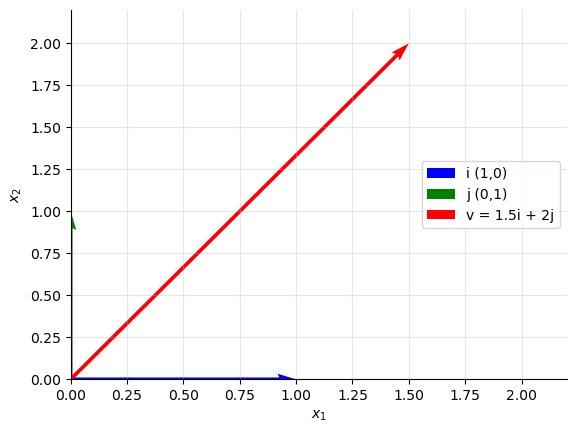

In [88]:
# plot of the basis vectors i = (1,0) and j = (0,1) with scaled vector v = 1.5i + 2j
fig, ax = plt.subplots()
# Basis vectors
ax.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', label='i (1,0)')
ax.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='green', label='j (0,1)')
# Scaled vector
ax.quiver(0, 0, 1.5, 2, angles='xy', scale_units='xy', scale=1, color='red', label='v = 1.5i + 2j')
ax.set_xlim(0, 2.2)
ax.set_ylim(0, 2.2)
ax.grid(True, alpha=0.3)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.legend(loc='center right')
sns.despine()
plt.show()

## Orthogonal vectors

Characteristics of orthogonal vectors:

- $\boldsymbol{x}$ and $\boldsymbol{y}$ are orthogonal if their dot product $\boldsymbol{x}^T \boldsymbol{y} = 0$
- Assuming non-zero norms:
    - they are at a 90° angle to each other
    - the $n$-dimensional space can have at most $n$ mutually orthogonal vectors
- *Orthonormal* vectors are orthogonal and all have unit norm (i.e., basis vectors).

### Orthogonal vectors with Python

In [89]:
i = np.array([1, 0])

In [90]:
j = np.array([0, 1])

In [91]:
np.dot(i, j)

0